In [1]:
import pandas as pd

# Load your datasets
approx_entropy_df = pd.read_csv('Combined_Entropy.csv')
entropy_per_channel_df = pd.read_csv('eeg_entropy_features.csv')
frequency_features_df = pd.read_csv('eeg_frequency_features.csv')

# Merge all datasets on Patient_ID
combined_data = approx_entropy_df.merge(entropy_per_channel_df, on="Patient_ID",how='left')
combined_data = combined_data.merge(frequency_features_df, on="Patient_ID",how='left')

print(combined_data.head(1))
print(combined_data.shape)
print(combined_data['Label'].value_counts())


    Patient_ID  Label_x       Fp1       Fp2        F3        F4        C3  \
0  v1p_v1p.csv        1  1.642273  1.399319  1.788776  1.385568  1.894291   

         C4        P3        P4  ...  occipital_theta_avg_power  \
0  1.719796  1.915635  1.512754  ...                 556.439793   

   occipital_alpha_avg_power  occipital_beta_avg_power  \
0                 417.316758                589.752563   

   occipital_gamma_avg_power  temporal_delta_avg_power  \
0                 195.140531                  879.2552   

   temporal_theta_avg_power  temporal_alpha_avg_power  \
0                580.225853                478.095124   

   temporal_beta_avg_power  temporal_gamma_avg_power  \
0               480.728786                 232.60505   

   frontal_parietal_theta_ratio  
0                      0.983045  

[1 rows x 242 columns]
(121, 242)
Label
1    61
0    60
Name: count, dtype: int64


In [2]:
# Merge with suffixes to keep track of Label columns
combined_data = approx_entropy_df.merge(entropy_per_channel_df, on="Patient_ID", how='left', suffixes=('', '_entropy'))
combined_data = combined_data.merge(frequency_features_df, on="Patient_ID", how='left', suffixes=('', '_frequency'))

# Check if 'Label_entropy' and 'Label_frequency' columns are identical to 'Label'
if 'Label_entropy' in combined_data.columns and (combined_data['Label'] == combined_data['Label_entropy']).all():
    combined_data = combined_data.drop(columns=['Label_entropy'])
if 'Label_frequency' in combined_data.columns and (combined_data['Label'] == combined_data['Label_frequency']).all():
    combined_data = combined_data.drop(columns=['Label_frequency'])

print(combined_data.head(1))
print(combined_data.shape)
print(combined_data['Label'].value_counts())


    Patient_ID  Label       Fp1       Fp2        F3        F4        C3  \
0  v1p_v1p.csv      1  1.642273  1.399319  1.788776  1.385568  1.894291   

         C4        P3        P4  ...  occipital_theta_avg_power  \
0  1.719796  1.915635  1.512754  ...                 556.439793   

   occipital_alpha_avg_power  occipital_beta_avg_power  \
0                 417.316758                589.752563   

   occipital_gamma_avg_power  temporal_delta_avg_power  \
0                 195.140531                  879.2552   

   temporal_theta_avg_power  temporal_alpha_avg_power  \
0                580.225853                478.095124   

   temporal_beta_avg_power  temporal_gamma_avg_power  \
0               480.728786                 232.60505   

   frontal_parietal_theta_ratio  
0                      0.983045  

[1 rows x 240 columns]
(121, 240)
Label
1    61
0    60
Name: count, dtype: int64


In [3]:
# Separate features and target label
X = combined_data.drop(columns=["Patient_ID", "Label"])
y = combined_data["Label"]


Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.70      0.78      0.74         9

    accuracy                           0.80        25
   macro avg       0.78      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



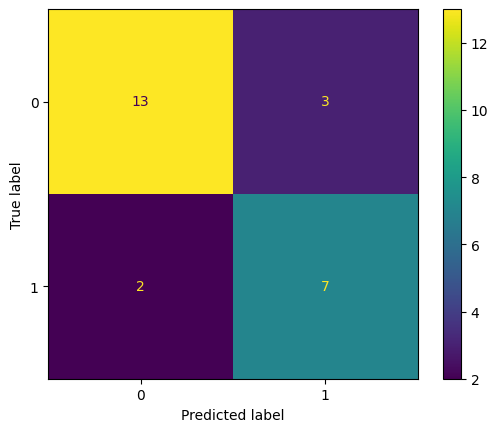

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', C=1, random_state=42, probability=True)  # You can experiment with different kernels (e.g., 'rbf')

svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)

PermutationExplainer explainer: 26it [00:17,  1.76s/it]                        



SHAP Summary Plot for Class 0 (Control)


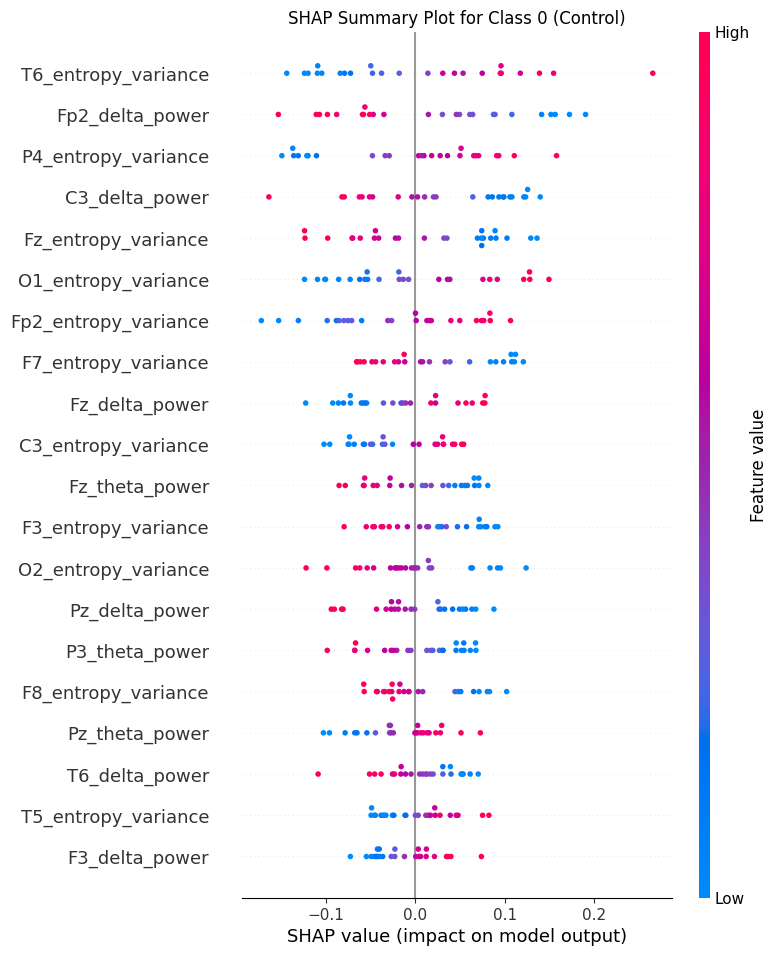


SHAP Summary Plot for Class 1 (ADHD)


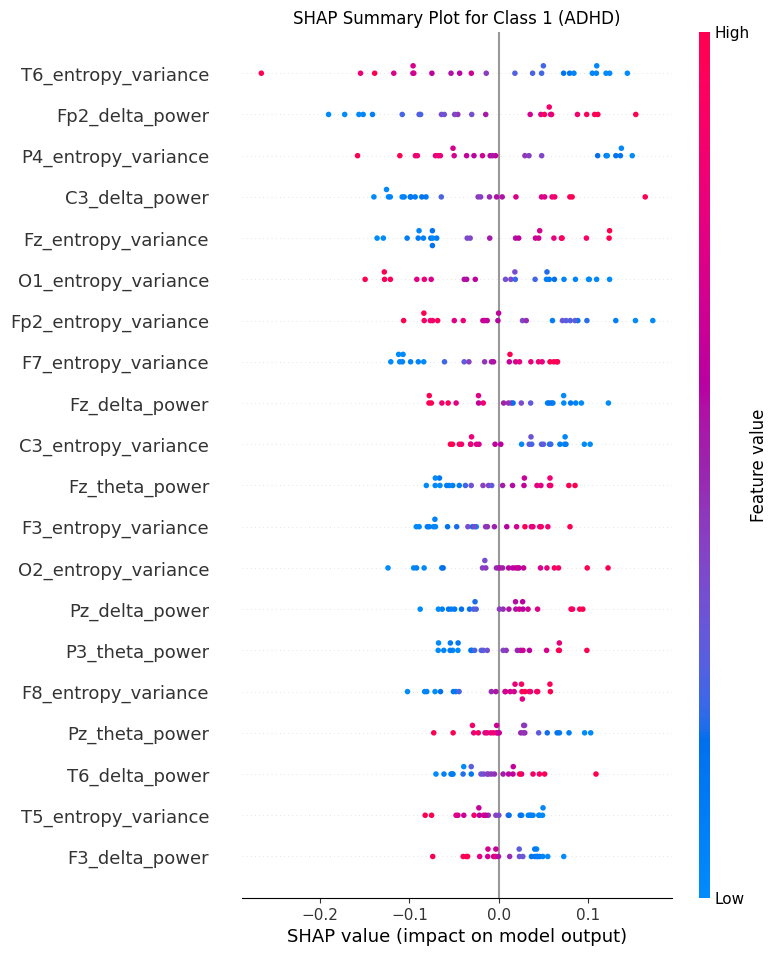

In [ ]:
import shap
import matplotlib.pyplot as plt
feature_names = X_train.columns.tolist()  # Get feature names from the training set
target_names = ['Control', 'ADHD']  # Modify these names based on your dataset's labels

# Initialize SHAP explainer for a binary classification model
explainer = shap.Explainer(svm_model.predict_proba, X_train)
shap_values = explainer(X_test)

# Loop through both classes (binary classification)
for class_label in range(2):
    print(f"\nSHAP Summary Plot for Class {class_label} ({target_names[class_label]})")

    # Extract SHAP values for the specific class
    class_shap_values = shap_values.values[:, :, class_label]
    
    # Plot SHAP summary for this class
    shap.summary_plot(class_shap_values, X_test,
                      feature_names=feature_names, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_label} ({target_names[class_label]})")
    plt.show()


c:\Users\smrit\miniconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\smrit\miniconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\smrit\miniconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

C:\Users\smrit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\smrit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Explanation for Instance: 0
Predicted Class: 0
Probability of Predicted Class: 0.6960243661533663
Local Feature Importance:
Fp2_delta_power <= 1023.16: -0.1643552364876418
T6_entropy_variance <= 2512.01: 0.14674989516319706
Fp2_entropy_variance <= 2593.83: 0.12666837095520847
Fz_entropy_variance <= 2480.50: -0.12256345601858638
F7_entropy_variance <= 2501.22: -0.11429047045990563
C3_delta_power <= 846.83: -0.10870206147886328
O1_entropy_variance <= 2509.10: 0.10843915357850208
Pz_theta_power <= 578.31: 0.09910660808813473
O2_entropy_variance <= 2601.71: -0.09787419673477177
Fz_delta_power <= 853.01: 0.08639517406418518


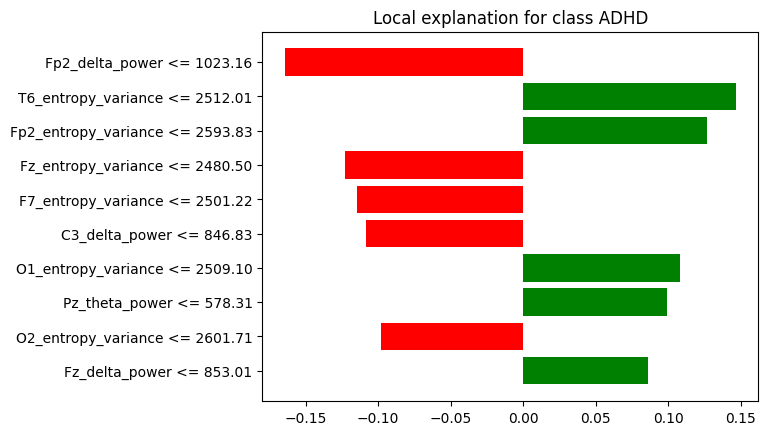

In [16]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Control', 'ADHD'],  # Adjust based on your label names
    mode='classification'
)
instance_index = 0
instance = X_test.iloc[instance_index]

# Choose a test instance to explain
exp = explainer.explain_instance(X_test.iloc[instance_index], svm_model.predict_proba, num_features=10)


exp.show_in_notebook(show_table=True)

print("Explanation for Instance:", instance_index)
print("Predicted Class:", svm_model.predict([instance])[0])
print("Probability of Predicted Class:", np.max(svm_model.predict_proba([instance])))
print("Local Feature Importance:")

for feature_name, weight in exp.as_list():
  print(f"{feature_name}: {weight}")
import matplotlib.pyplot as plt

# Customize the plot's background color
fig = exp.as_pyplot_figure()
fig.patch.set_facecolor('white')  # Change the background color to white

# Show the plot
plt.show()




In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly' kernels
}

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.761578947368421


Accuracy on Test Data: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.64      0.78      0.70         9

    accuracy                           0.76        25
   macro avg       0.75      0.76      0.75        25
weighted avg       0.78      0.76      0.76        25



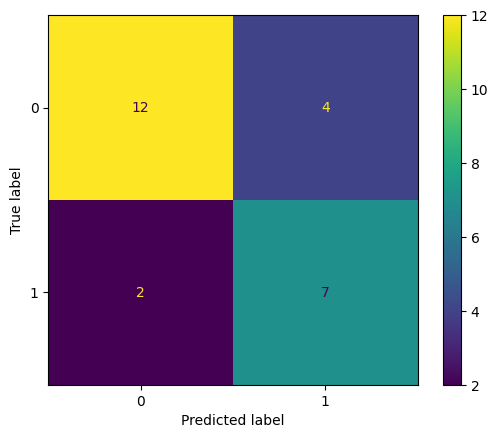

In [8]:
# Train SVM with best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Make predictions
y_pred = best_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test)

In [9]:
from sklearn.svm import SVC
poly_svm = SVC(kernel='poly', degree=3)  # You can experiment with different degrees
poly_svm.fit(X_train, y_train)
poly_accuracy = poly_svm.score(X_test, y_test)
print("Polynomial Kernel Accuracy:", poly_accuracy)


Polynomial Kernel Accuracy: 0.64


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the model
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test)

# Generate the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.70      0.78      0.74         9

    accuracy                           0.80        25
   macro avg       0.78      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25

Confusion Matrix:
 [[13  3]
 [ 2  7]]


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM classifier with RBF kernel
svm_rbf = SVC(kernel='sigmoid', random_state=42)

# Train the model
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test)

# Generate the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.70      0.78      0.74         9

    accuracy                           0.80        25
   macro avg       0.78      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25

Confusion Matrix:
 [[13  3]
 [ 2  7]]
